In [1]:
import matplotlib.pyplot as plt
import pickle

comments_all = pickle.load(open( "../../pickle/comments_all/comments_all.pkl", "rb" ))

comments_mix = comments_all
comments_mix.pop('post_id', None)

In [2]:
import pandas as pd
df = pd.read_csv('../../data/reddit_wsb.csv')

In [3]:
times = {}
for id in comments_mix:
    times[id] = []
    created = df.loc[df['id'] == id].iloc[0].created
    for comment in comments_mix[id]:
        times[id].append(comment.created_utc - created)
for id in times.keys():
    times[id].sort()

In [4]:
import numpy as np
bins_count = 12
bin_timeframe = 3600

buckets={}
for id in comments_all:
    buckets[id] = []
    cur_idx = 0
    for i in range(bins_count):
        buckets[id].append(0)
        for j in range(cur_idx, len(times[id])):
            if times[id][j]<bin_timeframe*(i+1):
                cur_idx += 1
                buckets[id][i] += 1
            else:
                break
                
    if np.sum(buckets[id])>len(times[id]):
        print(buckets[id])
        print(times[id])

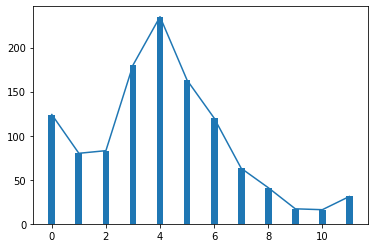

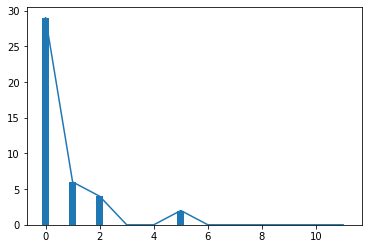

In [5]:
x  = [i*bin_timeframe/60/60 for i in range(bins_count)]

plt.plot(x, buckets['l8azdz'])
plt.bar(x, buckets['l8azdz'], width=0.25)
plt.show()

plt.plot(x, buckets['l922ub'])
plt.bar(x, buckets['l922ub'], width=0.25)
plt.show()

In [6]:
bucket_sum = 0
for bucket in buckets:
    bucket_sum += np.sum(buckets[bucket])

times_sum = 0
for time in times:
    times_sum += len(times[time])

print(bucket_sum/times_sum)

0.9242509912773307


In [7]:
buckets_df = pd.DataFrame(buckets.items(), columns=['id', 'buckets'])
buckets_df['buckets_1'] = buckets_df['buckets'].apply(lambda x: x[0])
buckets_df['buckets_2'] = buckets_df['buckets'].apply(lambda x: x[1])
buckets_df['buckets_3'] = buckets_df['buckets'].apply(lambda x: x[2])
buckets_df['buckets_4'] = buckets_df['buckets'].apply(lambda x: x[3])
buckets_df['buckets_5'] = buckets_df['buckets'].apply(lambda x: x[4])
print(buckets_df)

           id                                            buckets  buckets_1  \
0      l6ycbd               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]          0   
1      l6xfee               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]          0   
2      l706i4               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]          0   
3      l67xdl               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]          0   
4      l6yxnx               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]          0   
...       ...                                                ...        ...   
38696  l87hhd  [211, 178, 534, 643, 352, 217, 148, 50, 49, 39...        211   
38697  l68xm1  [113, 1041, 605, 249, 80, 40, 26, 4, 24, 4, 4, 7]        113   
38698  l78duc  [312, 739, 376, 190, 107, 57, 29, 10, 15, 11, ...        312   
38699  l7dt3n  [184, 270, 525, 355, 176, 92, 71, 50, 15, 15, ...        184   
38700  l69jz5  [234, 606, 766, 256, 103, 59, 7, 20, 19, 11, 9...        234   

       buckets_2  buckets_3  buckets_4  buckets_5  

In [8]:
attributes = pickle.load(open( "../../pickle/text_attributes_processed_comms_num.pkl", "rb" ))
attributes = pd.merge(attributes, buckets_df, on="id")

In [9]:
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

exclude = lambda x: x[x.columns.difference(EXCLUDED_COLUMNS)]

train, test = train_test_split(attributes, test_size=0.2, random_state=123)

EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_1', 'buckets_2', 'buckets_3', 'buckets_4', 'buckets_5']
train_without_exculded = exclude(train)
test_without_excluded = exclude(test)
attributes_without_excluded = exclude(attributes)


clf = MultiOutputRegressor(RandomForestRegressor(random_state=123)).fit(train_without_exculded, train['buckets'].to_list())
clf.predict(test_without_excluded)

array([[1.09554525e+01, 3.82747307e+00, 3.44269533e+00, ...,
        4.31824307e-01, 4.72250905e-01, 3.06592197e-01],
       [6.42500000e-01, 1.85518868e-01, 1.70801887e-01, ...,
        2.66981132e-01, 1.01415094e-02, 8.96226415e-03],
       [4.53235226e+00, 9.41744922e-01, 2.77072000e+00, ...,
        2.04000000e+00, 5.16000000e+00, 0.00000000e+00],
       ...,
       [1.02841262e+01, 1.83190870e+00, 1.50599880e+00, ...,
        1.81502027e-01, 1.20153682e-01, 1.87452776e-01],
       [3.11533333e+01, 5.02680303e+00, 1.61000000e+00, ...,
        4.00000000e-02, 0.00000000e+00, 2.00000000e-02],
       [8.33898562e+00, 6.38790545e-01, 2.44202899e-02, ...,
        2.82482000e-01, 2.82031052e-01, 2.81377421e-01]])

In [10]:
 clf_com_numms = RandomForestRegressor(random_state=123).fit(train_without_exculded, train['comms_num'].to_list())

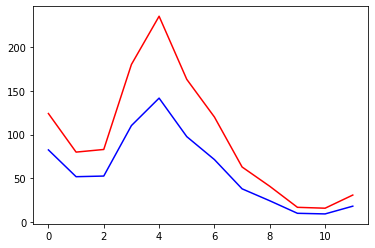

reddit comment count:  1305
actual comment count:  1289
timeslot comment count:  1153
old predicted comments 809.23
new predicted comments 708.6314166666667


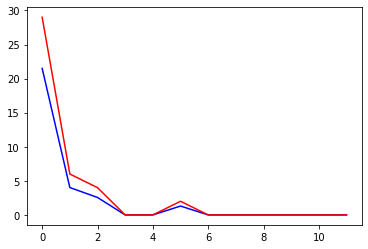

reddit comment count:  49
actual comment count:  41
timeslot comment count:  41
old predicted comments 36.93206926406926
new predicted comments 29.371579004329007


In [11]:
def probe_post(post_id,clf,attributes_excluded ):
    new_prediction = clf.predict(attributes_excluded[attributes['id']==post_id])[0]
    plt.plot(x, new_prediction, color='blue')
    plt.plot(x, buckets[post_id], color='red')
    plt.show()
    print('reddit comment count: ', attributes[attributes['id']==post_id]['comms_num'].to_list()[0])
    print('actual comment count: ', len(times[post_id]))
    print('timeslot comment count: ', np.sum(buckets[post_id]))
    print('old predicted comments', clf_com_numms.predict(attributes_without_excluded[attributes['id']==post_id])[0])
    print('new predicted comments', np.sum(new_prediction))

    
probe_post('l8azdz', clf, attributes_without_excluded)
probe_post('l922ub', clf, attributes_without_excluded)

In [12]:
EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_2', 'buckets_3', 'buckets_4', 'buckets_5']
train_without_exculded_1 = exclude(train)
test_without_excluded_1 = exclude(test)
attributes_without_excluded_1 = exclude(attributes)

clf_1 = MultiOutputRegressor(RandomForestRegressor(random_state=123)).fit(train_without_exculded_1, train['buckets'].to_list())

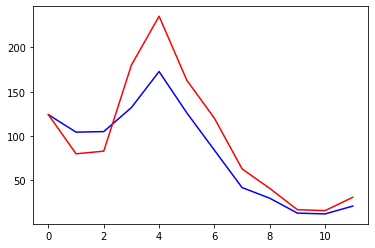

reddit comment count:  1305
actual comment count:  1289
timeslot comment count:  1153
old predicted comments 809.23
new predicted comments 966.96


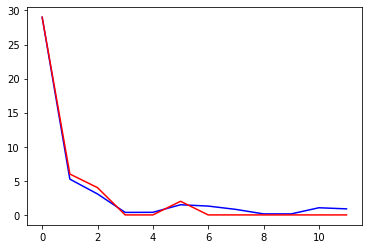

reddit comment count:  49
actual comment count:  41
timeslot comment count:  41
old predicted comments 36.93206926406926
new predicted comments 43.91266666666667


In [13]:
probe_post('l8azdz', clf_1, attributes_without_excluded_1)
probe_post('l922ub', clf_1, attributes_without_excluded_1)

In [14]:
EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_1', 'buckets_5']
train_without_exculded_3 = exclude(train)
test_without_excluded_3 = exclude(test)
attributes_without_excluded_3 = exclude(attributes)

clf_3 = MultiOutputRegressor(RandomForestRegressor(random_state=123)).fit(train_without_exculded_3, train['buckets'].to_list())

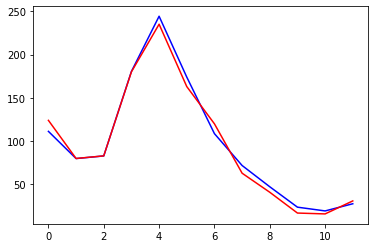

reddit comment count:  1305
actual comment count:  1289
timeslot comment count:  1153
old predicted comments 809.23
new predicted comments 1171.63


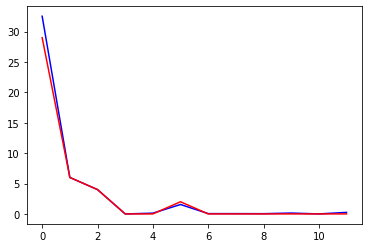

reddit comment count:  49
actual comment count:  41
timeslot comment count:  41
old predicted comments 36.93206926406926
new predicted comments 44.720000000000006


In [15]:
probe_post('l8azdz', clf_3, attributes_without_excluded_3)
probe_post('l922ub', clf_3, attributes_without_excluded_3)

In [16]:
EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets']
train_without_exculded_5 = exclude(train)
test_without_excluded_5 = exclude(test)
attributes_without_excluded_5 = exclude(attributes)


clf_5 = MultiOutputRegressor(RandomForestRegressor(random_state=123)).fit(train_without_exculded_5, train['buckets'].to_list())

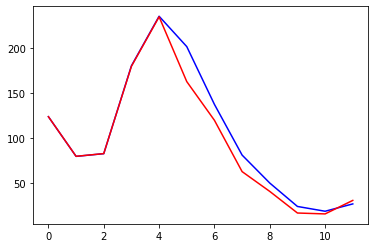

reddit comment count:  1305
actual comment count:  1289
timeslot comment count:  1153
old predicted comments 809.23
new predicted comments 1244.6799999999998


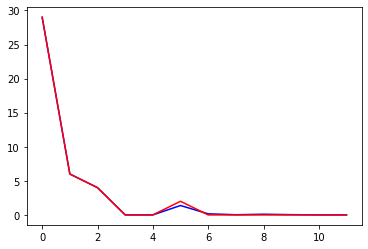

reddit comment count:  49
actual comment count:  41
timeslot comment count:  41
old predicted comments 36.93206926406926
new predicted comments 40.71


In [17]:
probe_post('l8azdz', clf_5, attributes_without_excluded_5)
probe_post('l922ub', clf_5, attributes_without_excluded_5)

In [18]:
%history -g

 1/1:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, auc, roc_auc_score
 1/2:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, auc, roc_auc_score
 1/3:
import pandas as pd
import numpy as np
 2/1:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, auc, roc_auc_score
 2/2:
import pandas as pd
import numpy as np
 2/3:
# skorzystaj z metody read_csv w module pandas
# ponieważ nadalismy temu modułowi alias, musisz wywołać
# pd.read_csv()
# wyszukaj w Internecie jakie parametry przyjmuje ta funkcja
# wynik wywołania przypisz do zmiennej df
df = pd.read_csv('titanic.csv')
 2/4: df.head(10)
 2/5:
df_filtered = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_filtered.head(

35/45:

import tensorflow as tf

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

import os
import time

from matplotlib import pyplot as plt
from IPython import display
35/46:

!pip install -q -U tensorboard
35/47:

_URL = 'https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/facades.tar.gz'

path_to_zip = tf.keras.utils.get_file('facades.tar.gz',
                                      origin=_URL,
                                      extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'facades/')
36/1:
import tensorflow as tf

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

import os
import time

from matplotlib import pyplot as plt
from IPython import display
37/1:
import tensorflow as tf

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

import os
import time

from matplotlib import pyplot as plt
from IPython import display
37/2:
impor

45/18:
# down_model = downsample(3, 4)
# down_result = down_model(tf.expand_dims(inp, 0))
# print (down_result.shape)
45/19:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result
45/20:
# up_model = upsample(3, 4)
# up_result = up_model(down_result)
# print (up_result.shape)
45/21:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (bs, 128, 128, 64)
    downsample(128, 4),  # (bs, 64, 64, 128)
    do

91/79:
def prune(most_common_words):
  for key, cnts in list(most_common_words.items()):
    if not key in emoji.UNICODE_EMOJI and (not re.match(r'\w+',key) or len(key) < 2):
      del most_common_words[key]
  for i in ['don\\u2019', 'i\\u2019', 'it\\u2019s']:
    del most_common_words[i]

print(" ".join(list(img_text.values())))
img_most_common = Counter(" ".join(" ".join(img_text)).split(" "))
print(img_most_common)
prune(img_most_common)
img_most_common.most_common(100)
91/80:
def prune(most_common_words):
  for key, cnts in list(most_common_words.items()):
    if not key in emoji.UNICODE_EMOJI and (not re.match(r'\w+',key) or len(key) < 2):
      del most_common_words[key]
  for i in ['don\\u2019', 'i\\u2019', 'it\\u2019s']:
    del most_common_words[i]

print(" ".join(list(img_text.values()).map(lambda x: " ".join(x))))
img_most_common = Counter(" ".join(" ".join(img_text)).split(" "))
print(img_most_common)
prune(img_most_common)
img_most_common.most_common(100)
91/81:
def prune(

130/6:
def prune(most_common_words):
  for key, cnts in list(most_common_words.items()):
    if not key in emoji.UNICODE_EMOJI and (not re.match(r'\w+',key) or len(key) < 2):
      del most_common_words[key]
  for i in ['don\\u2019', 'i\\u2019', 'it\\u2019s']:
    del most_common_words[i]

img_most_common = Counter(" ".join(list(map(lambda x: " ".join(x), list(img_text.values())))).split(" "))
prune(img_most_common)
img_most_common.most_common(100)
130/7:
pic_data = {}
pic_data['id'] = []
pic_data['text'] = []
pic_data['clusters'] = []
pic_data['means'] = []
pic_data['score'] = []
pic_data['classses'] = []

for key in img_means.keys():
  pic_data['id'].append(key)
  pic_data['text'].append(" ".join(img_text[key[:-4]]))
  pic_data['clusters'].append(img_clusters[key])
  pic_data['means'].append(img_means[key])
  pic_data['score'].append(df.loc[df['id'] == key[:-4]]['score'].values[0])
  pic_data['classses'].append(img_classes[key]['all_prob'][0])

pic_data = pandas.DataFrame(pic_data)
1

179/5: pickle.dump(comments_mix, open("./pickle/comments_all/comments_all.pkl", "wb"))
179/6: pickle.dump(comments_mix, open("../../pickle/comments_all/comments_all.pkl", "wb"))
179/7:
comments_all = pickle.load(open( "../../pickle/comments_all/comments_all_new_38000.pkl", "rb" ))
comments_last_200 = pickle.load(open( "../../pickle/comments_all/comments_all_38200.pkl", "rb" ))

keys_to_remove =  df['id'][:38000]
for key in keys_to_remove:
  del comments_last_200[key]

print(len(comments_last_200))

# comments_mix = {**comments_all, **comments_last_200}
# comments_mix.pop('post_id', None)

# ids = df['id'][:]
179/8:

comments_last_200 = pickle.load(open( "../../pickle/comments_all/comments_all_38200.pkl", "rb" ))
print(len(comments_last_200))
keys_to_remove =  df['id'][:38000]
for key in keys_to_remove:
  del comments_last_200[key]

print(len(comments_last_200))

# comments_mix = {**comments_all, **comments_last_200}
# comments_mix.pop('post_id', None)

# ids = df['id'][:]
180/1:
from p

187/51:
def probe_post(post_id):
    plt.plot(x, clf.predict(attributes_without_excluded[attributes['id']==post_id])[0], color='blue')
    plt.plot(x, buckets[post_id], color='red')
    plt.show()
    print('reddit comment count: ', attributes[attributes['id']==post_id]['comms_num'].to_list()[0])
    print('actual comment count: ', len(times[post_id]))
    print('timeslot comment count: ', np.sum(buckets[post_id]))

    
probe_post('l8azdz')
probe_post('l922ub')

print(buckets['l922ub'])
187/52:
def probe_post(post_id):
    plt.plot(x, clf.predict(attributes_without_excluded[attributes['id']==post_id])[0], color='blue')
    plt.plot(x, buckets[post_id], color='red')
    plt.show()
    print('reddit comment count: ', attributes[attributes['id']==post_id]['comms_num'].to_list()[0])
    print('actual comment count: ', len(times[post_id]))
    print('timeslot comment count: ', np.sum(buckets[post_id]))

    
probe_post('l8azdz')
probe_post('l922ub')

print(times['l922ub'])
187/53:
bins_cou